In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)
n_samples = 50
X = np.sort(np.random.rand(n_samples, 1), axis=0)
y = 1 + 0.5 * X + np.random.normal(0, 0.3, (n_samples, 1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [5]:
print(f"--- Linear Regression ---")
print(f"Coefficient (Slope): {lr.coef_[0][0]:.4f}")
print(f"MSE: {mean_squared_error(y_test, lr_pred):.4f}")

--- Linear Regression ---
Coefficient (Slope): 0.6314
MSE: 0.0717


In [9]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test).reshape(-1, 1)

print(f"\n--- Ridge Regression (alpha=1.0) ---")
# handle coef_ whether it's a scalar, 1-D or 2-D array
print(f"Coefficient (Slope): {ridge.coef_.ravel()[0]:.4f}")
print(f"MSE: {mean_squared_error(y_test, ridge_pred):.4f}")


--- Ridge Regression (alpha=1.0) ---
Coefficient (Slope): 0.4695
MSE: 0.0669


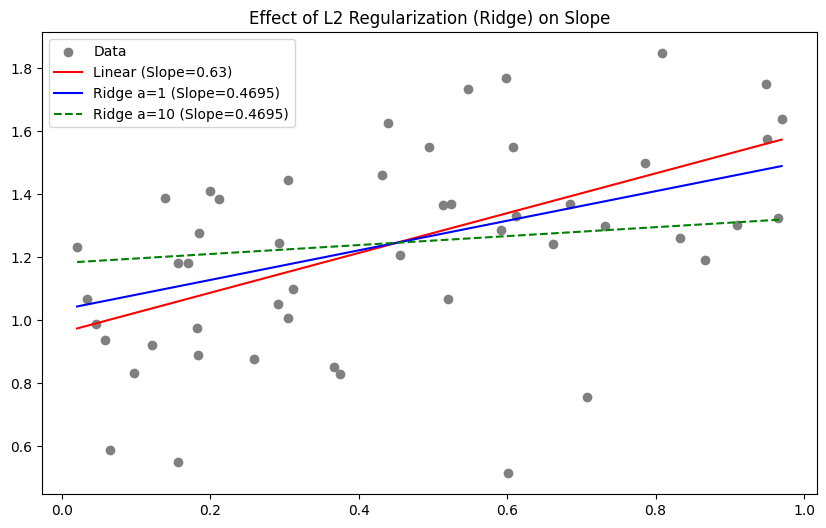

In [12]:
ridge_strong = Ridge(alpha=10.0)
ridge_strong.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, lr.predict(X), color='red', label=f'Linear (Slope={lr.coef_[0][0]:.2f})')
plt.plot(X, ridge.predict(X), color='blue', label=f'Ridge a=1 (Slope={ridge.coef_.ravel()[0]:.4f})')
plt.plot(X, ridge_strong.predict(X), color='green', linestyle='--', label=f'Ridge a=10 (Slope={ridge.coef_.ravel()[0]:.4f})')

plt.title("Effect of L2 Regularization (Ridge) on Slope")
plt.legend()
plt.show()